In [1]:
import numpy as np
import pandas as pd
pd.options.display.max_columns=100
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.decomposition import PCA

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

In [2]:
data = pd.read_csv("Data-Prepped-ELO-3-Groups.csv",index_col=0)
data = data.astype(np.float32)
data.head()

Low_ELO  Med_ELO  High_ELO  GroupedLeagueIndex  LeagueIndex   Age  \
0      0.0      1.0       0.0                 1.0          5.0  27.0   
1      0.0      1.0       0.0                 1.0          5.0  23.0   
2      0.0      1.0       0.0                 1.0          4.0  30.0   
3      1.0      0.0       0.0                 0.0          3.0  19.0   
4      1.0      0.0       0.0                 0.0          3.0  32.0   

   HoursPerWeek  TotalHours         APM  SelectByHotkeys  AssignToHotkeys  \
0          10.0      3000.0  143.718002         0.003515         0.000220   
1          10.0      5000.0  129.232193         0.003304         0.000259   
2          10.0       200.0   69.961197         0.001101         0.000336   
3          20.0       400.0  107.601601         0.001034         0.000213   
4          10.0       500.0  122.890800         0.001136         0.000327   

   UniqueHotkeys  MinimapAttacks  MinimapRightClicks  NumberOfPACs  \
0            7.0        0.000110            0.000392      0.004849   
1            4.0        0.000294            0.000432      0.004307   
2            4.0        0.000294            0.000461      0.002926   
3            1.0        0.000053            0.000543      0.003783   
4            2.0        0.000000            0.001329      0.002368   

   GapBetweenPACs  ActionLatency  ActionsInPAC  TotalMapExplored  WorkersMade  \
0       32.667702      40.867298        4.7508              28.0     0.001397   
1       32.919399      42.345402        4.8434              22.0     0.001194   
2       44.647499      75.354797        4.0430              22.0     0.000745   
3       29.220301      53.735199        4.9155              19.0     0.000426   
4       22.688499      62.081299        9.3740              15.0     0.001174   

   UniqueUnitsMade  ComplexUnitsMade  ComplexAbilitiesUsed  
0              6.0               0.0              0.000000  
1              5.0               0.0              0.000208  
2              6.0               0.0              0.000189  
3              7.0               0.0              0.000384  
4              4.0               0.0              0.000019

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3338 entries, 0 to 3337
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Low_ELO               3338 non-null   float32
 1   Med_ELO               3338 non-null   float32
 2   High_ELO              3338 non-null   float32
 3   GroupedLeagueIndex    3338 non-null   float32
 4   LeagueIndex           3338 non-null   float32
 5   Age                   3338 non-null   float32
 6   HoursPerWeek          3338 non-null   float32
 7   TotalHours            3338 non-null   float32
 8   APM                   3338 non-null   float32
 9   SelectByHotkeys       3338 non-null   float32
 10  AssignToHotkeys       3338 non-null   float32
 11  UniqueHotkeys         3338 non-null   float32
 12  MinimapAttacks        3338 non-null   float32
 13  MinimapRightClicks    3338 non-null   float32
 14  NumberOfPACs          3338 non-null   float32
 15  GapBetweenPACs       

In [4]:
inddatatxt = open("Data Explanation -- StarCraft II Ranked Players.txt")
print(inddatatxt.read())
var = []
for i in data:
    var.append(i)

Data project data categories

Data pulled from https://www.kaggle.com/danofer/skillcraft which pulled the data from the University of California Irvine's machine learning repository located at http://archive.ics.uci.edu/ml/datasets/SkillCraft1+Master+Table+Dataset 

This data is taken from replays of 1v1 ranked games of StarCraft II, a real time strategy game in which two or more players compete by accruing resources, building an army and wiping out the enemy. 
A player loses when all of their buildings are destroyed or when they surrender.
Players each start with one base hub and a number of workers located symmetrically on a map. The map is littered with locations containing clusters of minerals and usually gas geysers. 
These are the resources which the players will use to build buildings, construct new technologies and produce armies. 



00 GameID				#
01 LeagueIndex			# Numerical list (1-8) based on categorical rank. Can be considered both categorical and numerical
02 Age				# Ag

In [5]:
data.describe()

Low_ELO      Med_ELO     High_ELO  GroupedLeagueIndex  LeagueIndex  \
count  3338.000000  3338.000000  3338.000000         3338.000000  3338.000000   
mean      0.319652     0.483823     0.196525            0.876872     4.120731   
std       0.466412     0.499813     0.397429            0.707932     1.448170   
min       0.000000     0.000000     0.000000            0.000000     1.000000   
25%       0.000000     0.000000     0.000000            0.000000     3.000000   
50%       0.000000     0.000000     0.000000            1.000000     4.000000   
75%       1.000000     1.000000     0.000000            1.000000     5.000000   
max       1.000000     1.000000     1.000000            2.000000     7.000000   

               Age  HoursPerWeek      TotalHours          APM  \
count  3338.000000   3338.000000     3338.000000  3338.000000   
mean     21.650389     15.909527      960.421814   114.575768   
std       4.206357     11.964495    17318.134766    48.111912   
min      16.000000      0.000000        3.000000    22.059601   
25%      19.000000      8.000000      300.000000    79.231501   
50%      21.000000     12.000000      500.000000   107.070297   
75%      24.000000     20.000000      800.000000   140.156094   
max      44.000000    168.000000  1000000.000000   389.831390   

       SelectByHotkeys  AssignToHotkeys  UniqueHotkeys  MinimapAttacks  \
count      3338.000000      3338.000000    3338.000000     3338.000000   
mean          0.004023         0.000364       4.316357        0.000094   
std           0.004726         0.000210       2.333322        0.000159   
min           0.000000         0.000000       0.000000        0.000000   
25%           0.001245         0.000202       3.000000        0.000000   
50%           0.002445         0.000349       4.000000        0.000039   
75%           0.004945         0.000493       6.000000        0.000113   
max           0.043088         0.001648      10.000000        0.003019   

       MinimapRightClicks  NumberOfPACs  GapBetweenPACs  ActionLatency  \
count         3338.000000   3338.000000     3338.000000    3338.000000   
mean             0.000380      0.003433       40.713818      64.209587   
std              0.000359      0.000966       17.057190      19.037394   
min              0.000000      0.000679        6.666700      24.632601   
25%              0.000139      0.002743       29.326599      50.886426   
50%              0.000278      0.003376       37.058901      61.296099   
75%              0.000508      0.004003       48.510426      74.032524   
max              0.003688      0.007971      237.142899     176.372101   

       ActionsInPAC  TotalMapExplored  WorkersMade  UniqueUnitsMade  \
count   3338.000000       3338.000000  3338.000000      3338.000000   
mean       5.266955         22.116837     0.001031         6.541042   
std        1.500605          7.440876     0.000520         1.859048   
min        2.038900          5.000000     0.000077         2.000000   
25%        4.261525         17.000000     0.000682         5.000000   
50%        5.087050         22.000000     0.000904         6.000000   
75%        6.027350         27.000000     0.001258         8.000000   
max       18.558100         58.000000     0.005149        13.000000   

       ComplexUnitsMade  ComplexAbilitiesUsed  
count       3338.000000           3338.000000  
mean           0.000060              0.000142  
std            0.000112              0.000266  
min            0.000000              0.000000  
25%            0.000000              0.000000  
50%            0.000000              0.000020  
75%            0.000087              0.000182  
max            0.000902              0.003084

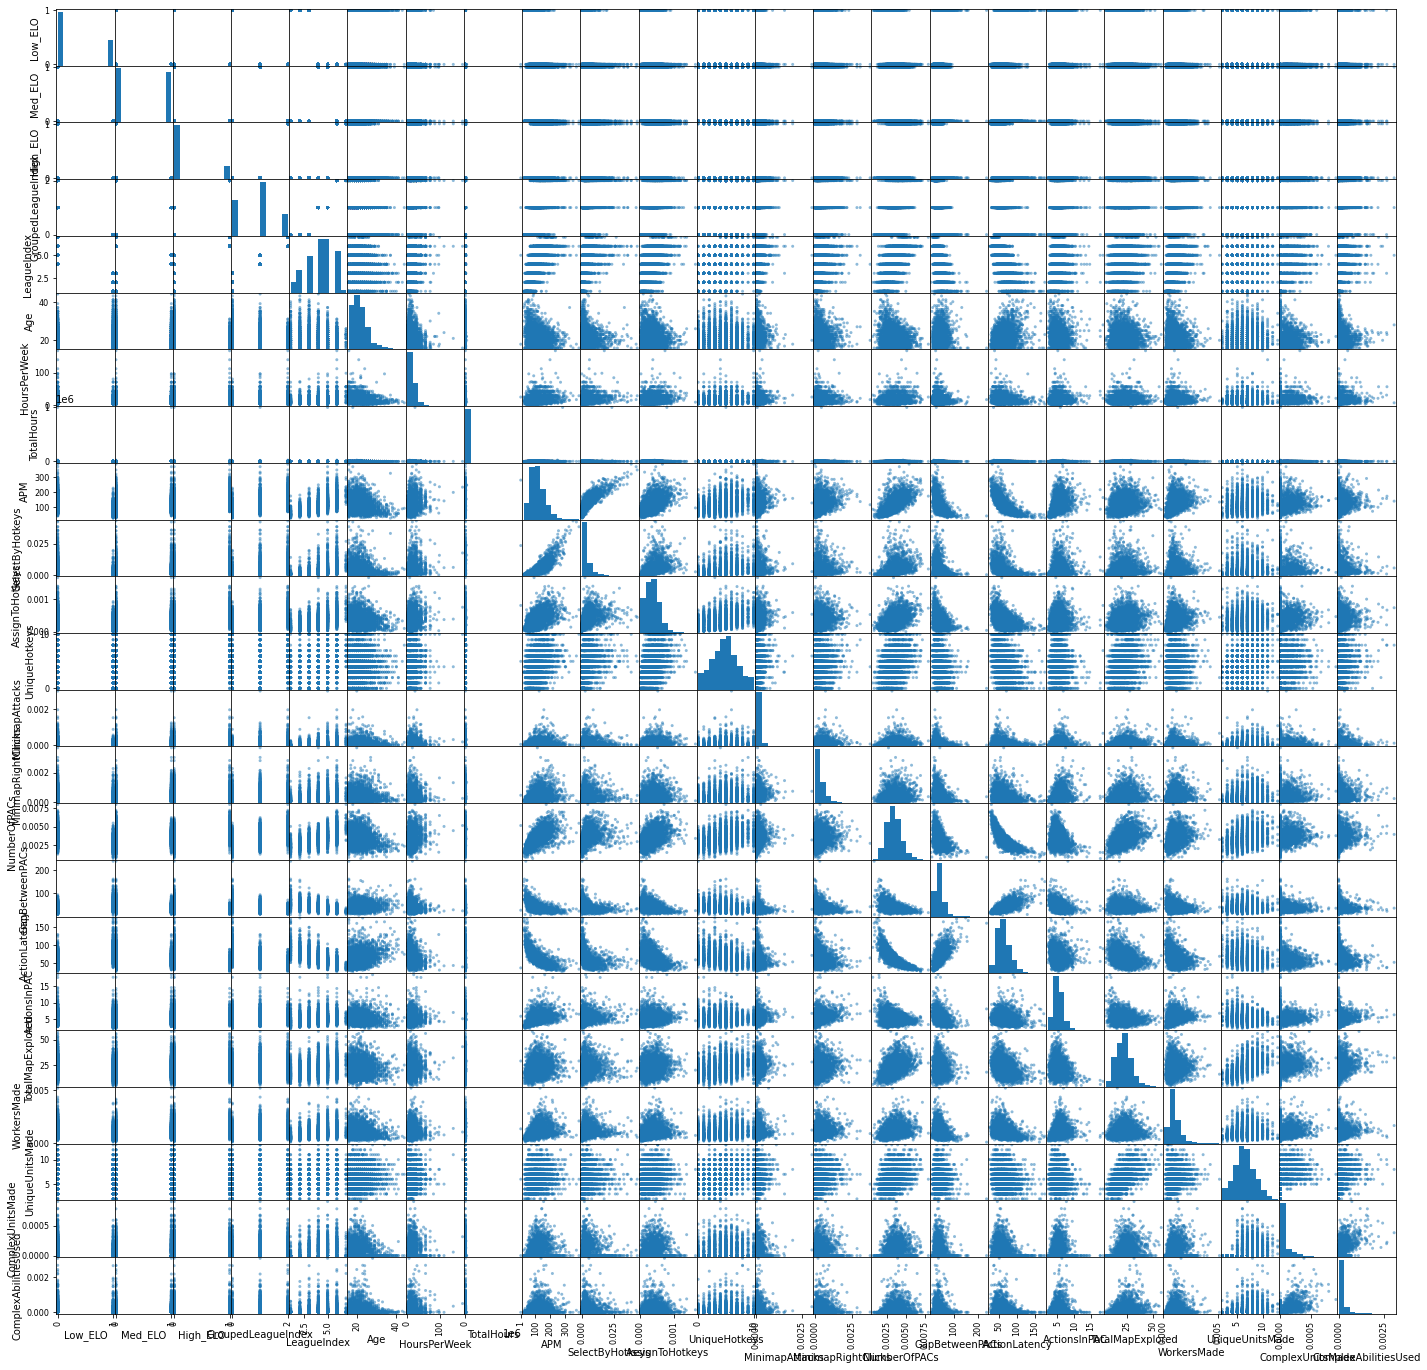

In [6]:
pd.plotting.scatter_matrix(data,figsize=(24,24))
plt.show()

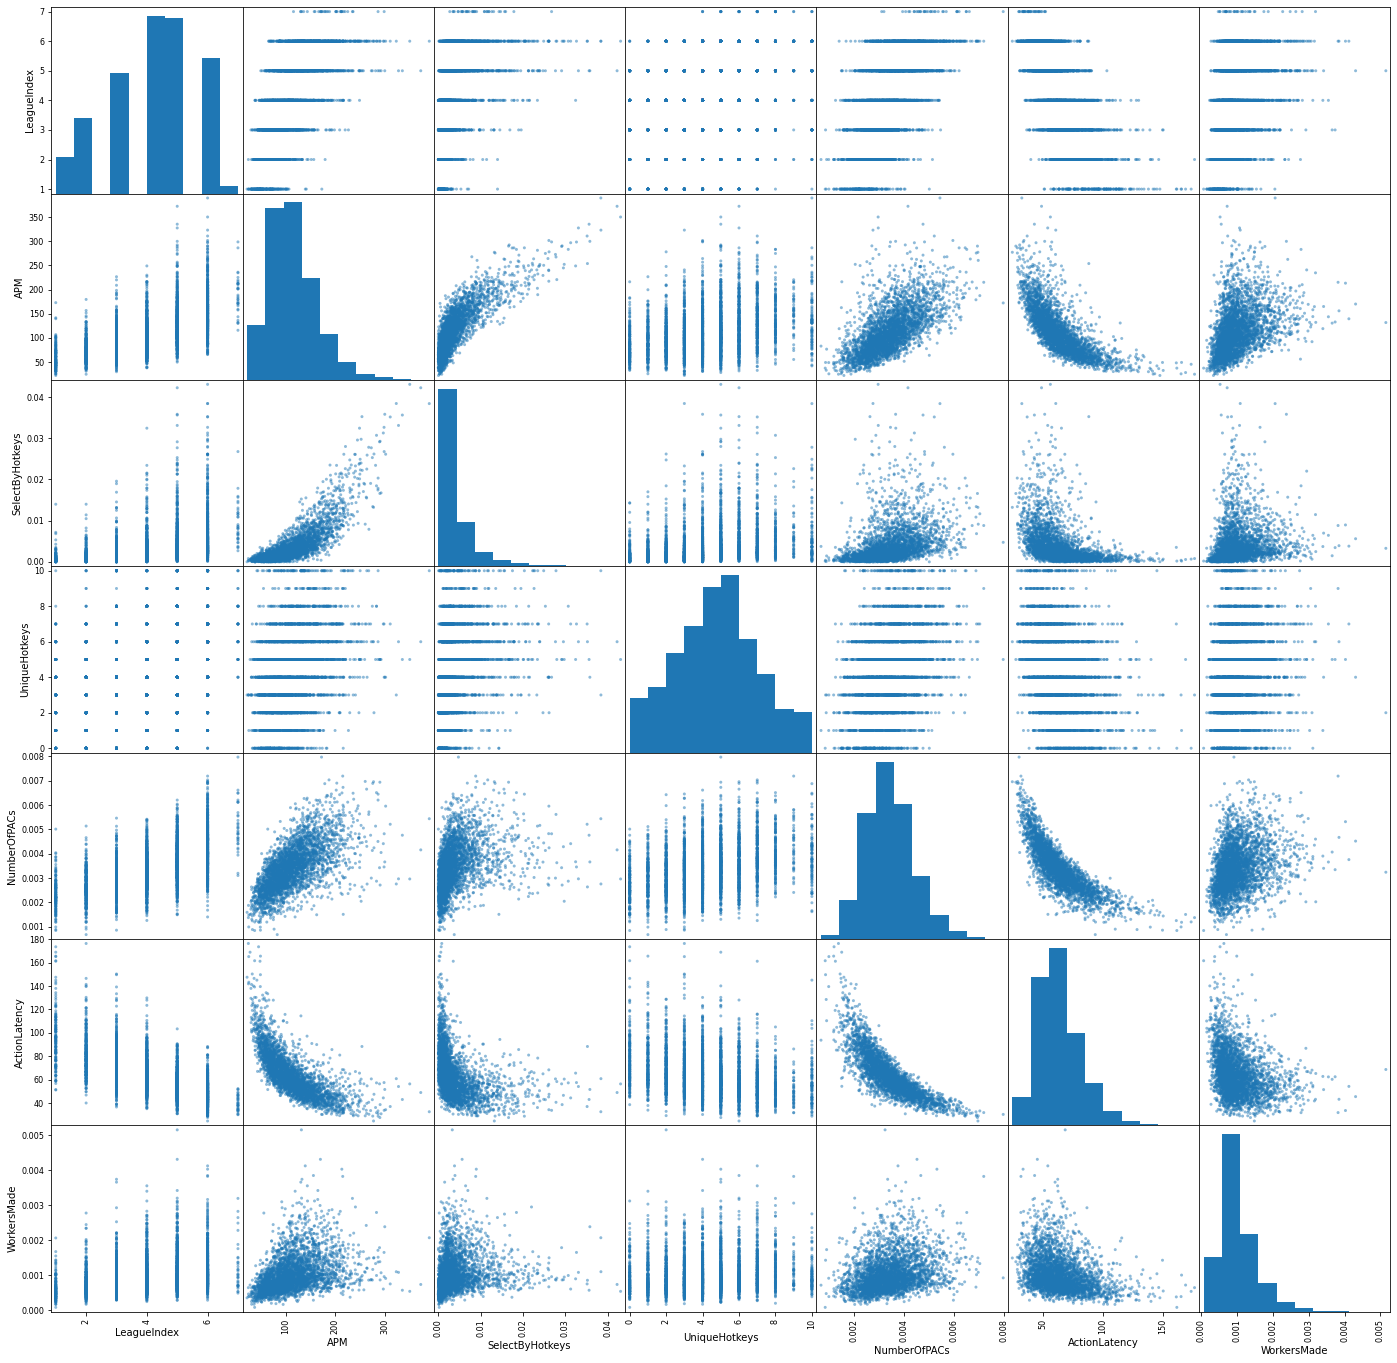

In [7]:
IDs = ['LeagueIndex','APM','SelectByHotkeys','UniqueHotkeys','NumberOfPACs','ActionLatency','WorkersMade']
pd.plotting.scatter_matrix(data[IDs],figsize=(24,24))
plt.show()

### Examine variables from sklearn.decomposition.PCA

In [8]:
pca = PCA()
pca.fit(data[IDs])
data_transformed = pd.DataFrame(pca.transform(data[IDs]))
data_transformed.shape

(3338, 7)

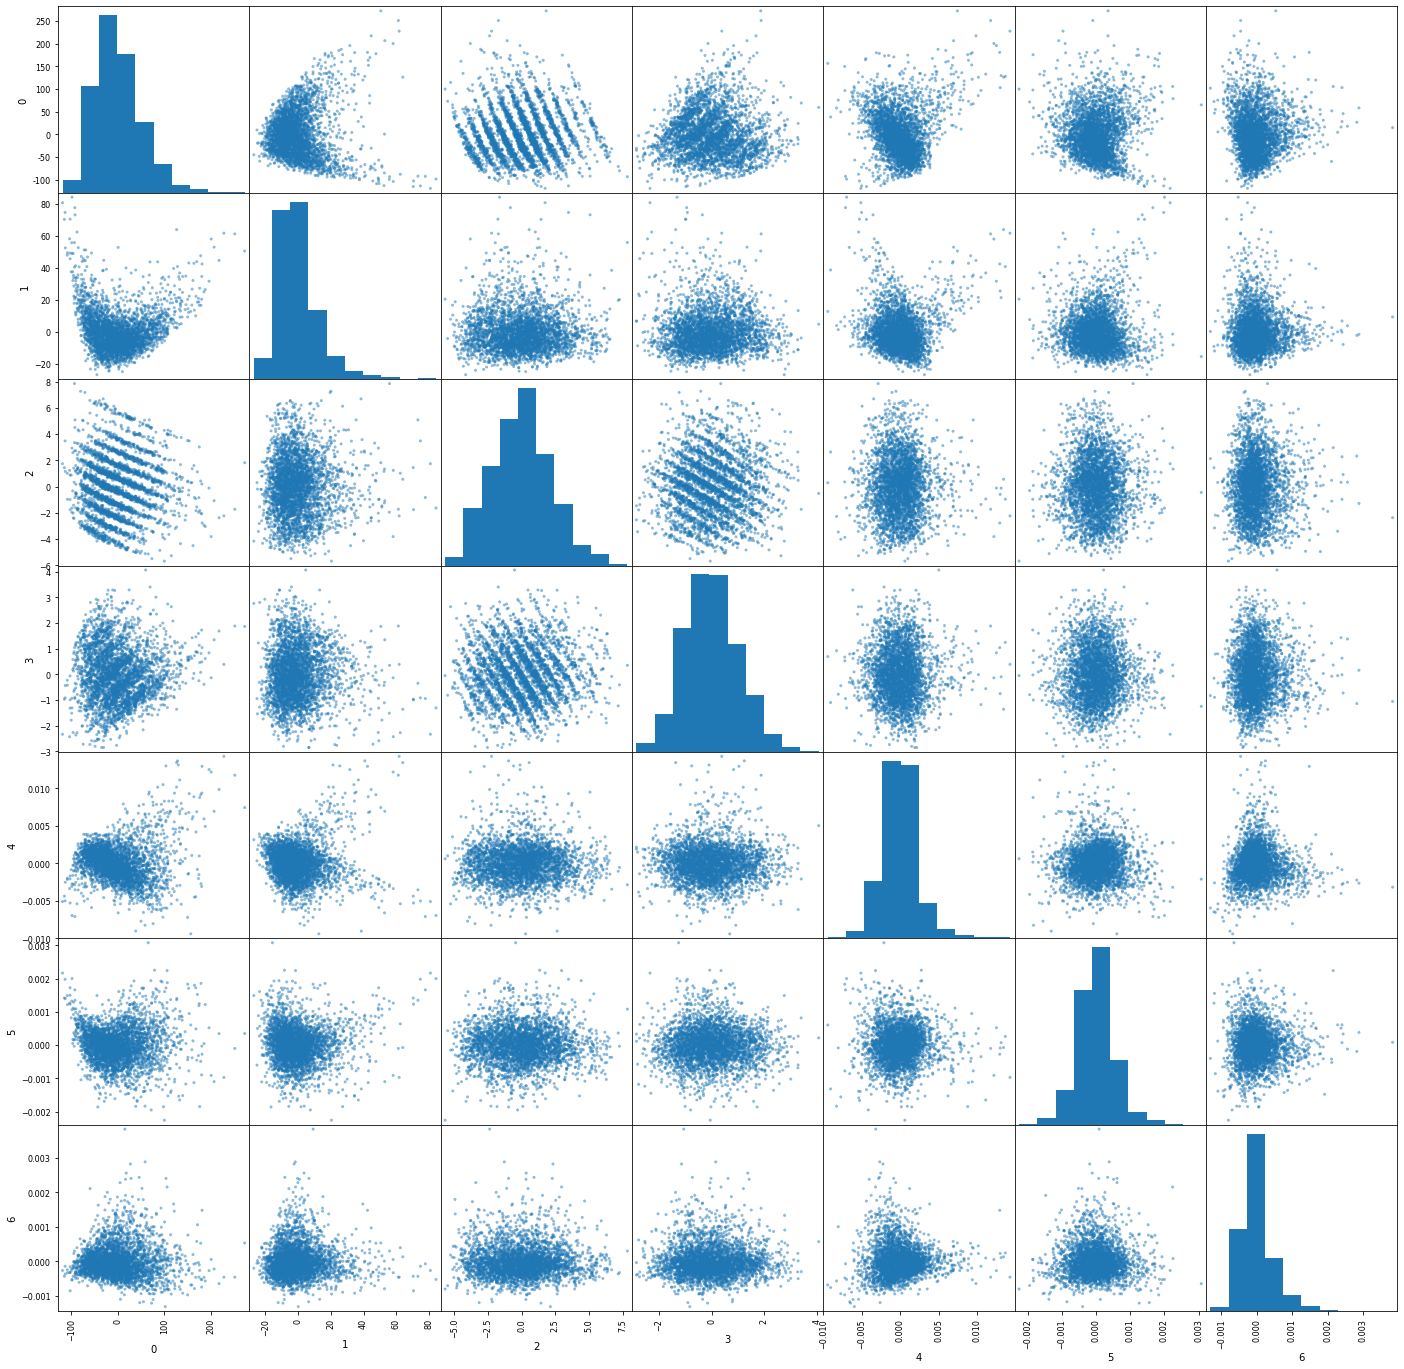

In [9]:
pd.plotting.scatter_matrix(data_transformed,figsize=(24,24))
plt.show()

In [10]:
# Code for the following graphs based on https://www.kaggle.com/immodal/predicting-player-placement
leagueTitles = ["Low ELO","Med ELO","High ELO"]
leagueIndexs = [      0.0,      1.0,       2.0]
colors       = ['darkgoldenrod','silver','gold']
leagueDict   = dict()
for i, ind in enumerate(leagueIndexs):
    leagueDict[ind] = leagueTitles[i]
leagueLabeled = data["GroupedLeagueIndex"].replace(leagueDict)

def violin_plot(y, title, w, h):
    plt.figure(figsize=(w,h))
    ax = sns.violinplot(x=leagueLabeled,y=y,palette=colors,order=leagueTitles)
    ax.set(xlabel='ELO Group')
    ax.set_ylim(0,)
    plt.title(title)
    plt.show()
    
def density_plot(x, title, w, h):
    fig, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15,.85)})
    fig.set_size_inches(w,h)
    ax_box.set_xlim(0,x.max())
    ax_hist.set_xlim(0,x.max())
    sns.boxplot(x,ax=ax_box)
    sns.distplot(x,ax=ax_hist)
    ax_box.set(yticks=[])
    sns.despine(ax=ax_hist)
    sns.despine(ax=ax_box,left=True)
    ax_box.set_title(title)
    plt.show()
    
def plot(feature, fig_num):
    density_plot(data[feature],f"Figure {fig_num}: {feature} Distribution", 11,8)
    violin_plot(data[feature],f"Figure {fig_num}: {feature} by League", 11,8)

C:\Users\Triplea657\anaconda3\envs\MSCS335\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Triplea657\anaconda3\envs\MSCS335\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


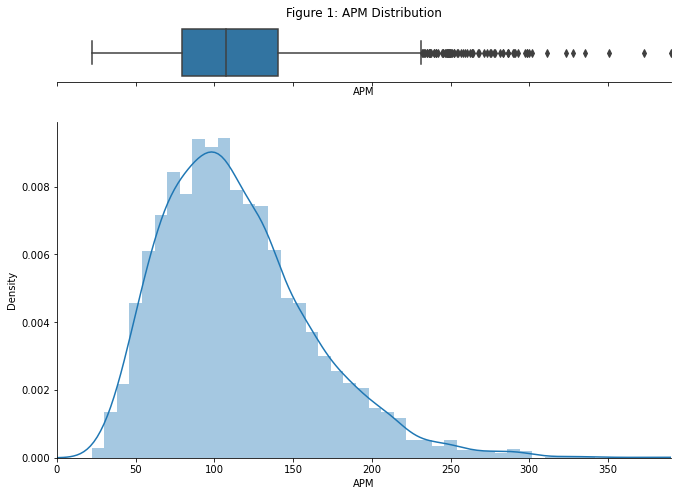

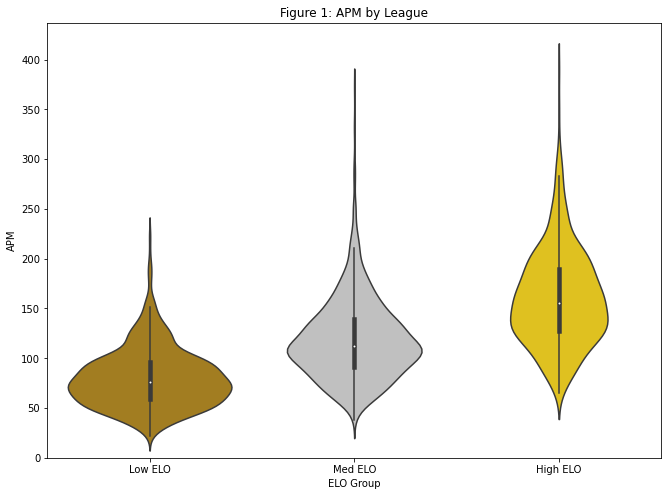

In [11]:
plot("APM",1)

C:\Users\Triplea657\anaconda3\envs\MSCS335\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Triplea657\anaconda3\envs\MSCS335\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


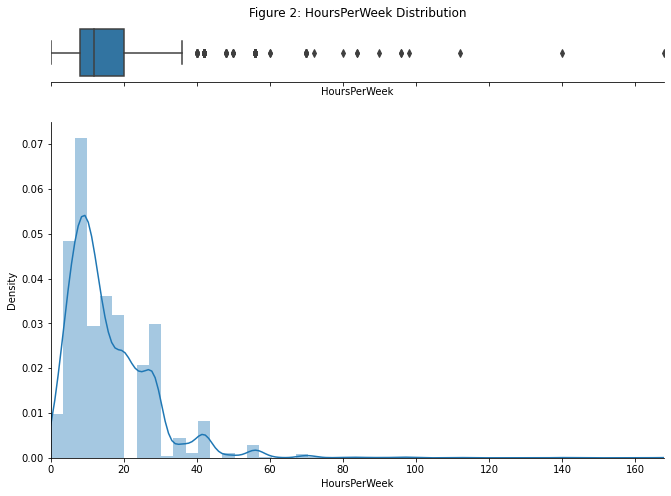

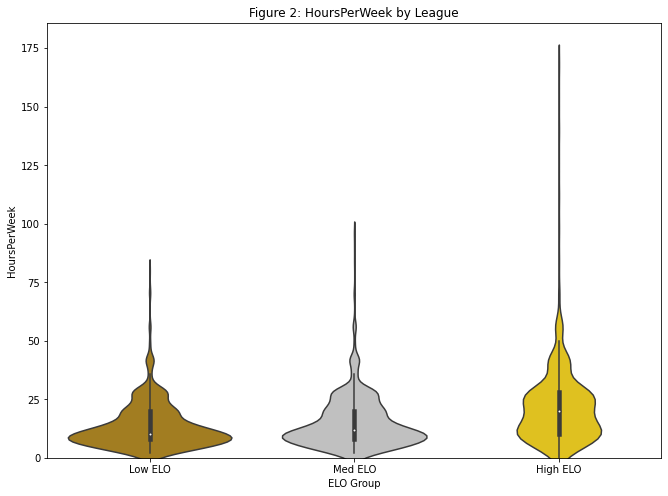

In [12]:
plot("HoursPerWeek",2)

C:\Users\Triplea657\anaconda3\envs\MSCS335\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Triplea657\anaconda3\envs\MSCS335\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


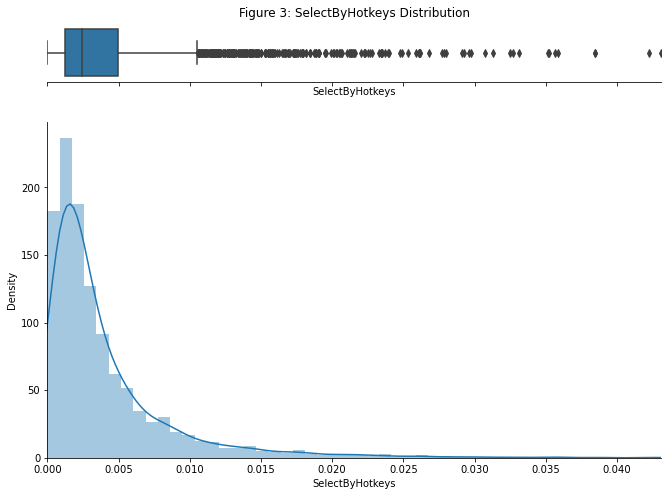

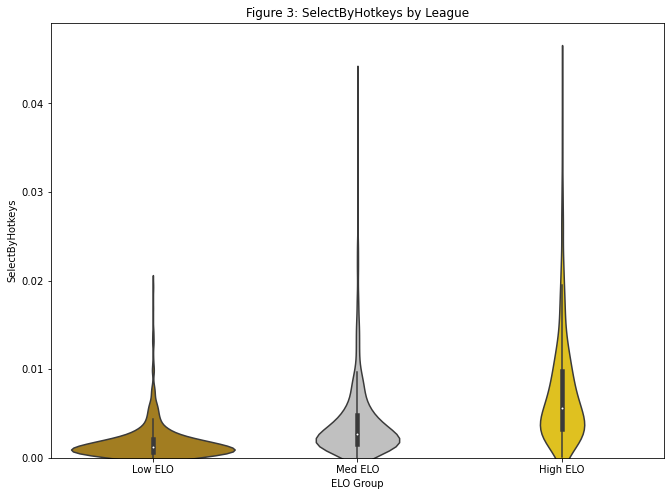

In [13]:
plot("SelectByHotkeys",3)

C:\Users\Triplea657\anaconda3\envs\MSCS335\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Triplea657\anaconda3\envs\MSCS335\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


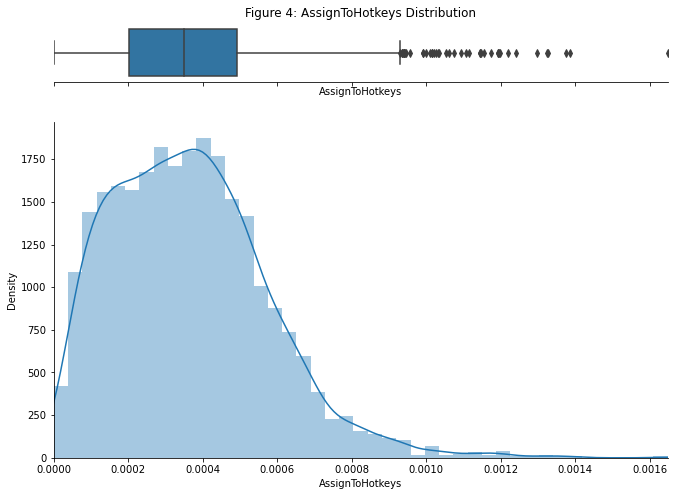

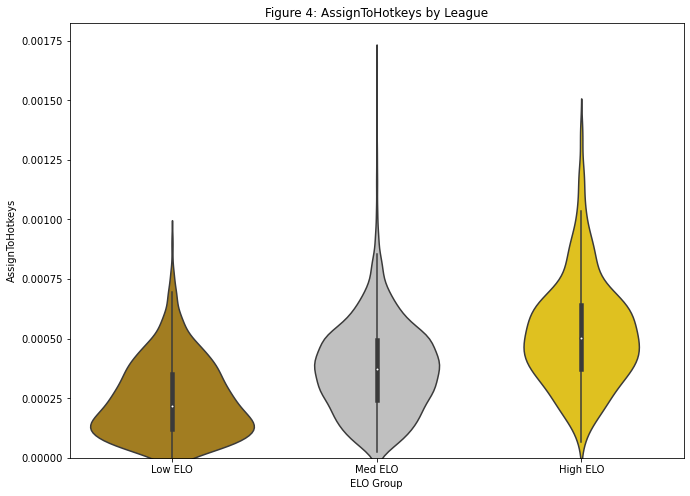

In [14]:
plot("AssignToHotkeys",4)

C:\Users\Triplea657\anaconda3\envs\MSCS335\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Triplea657\anaconda3\envs\MSCS335\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


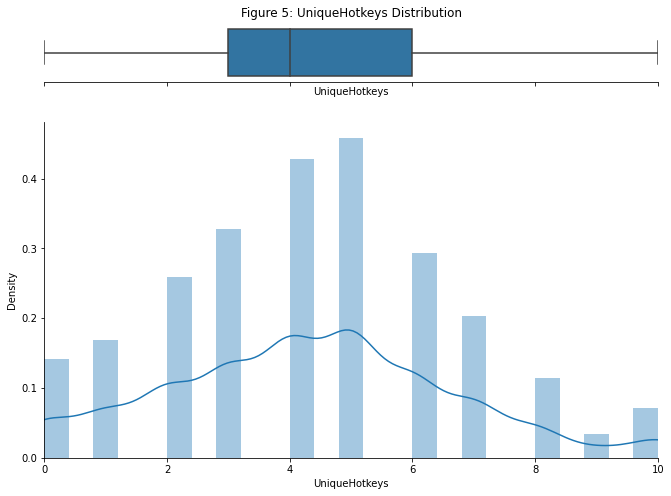

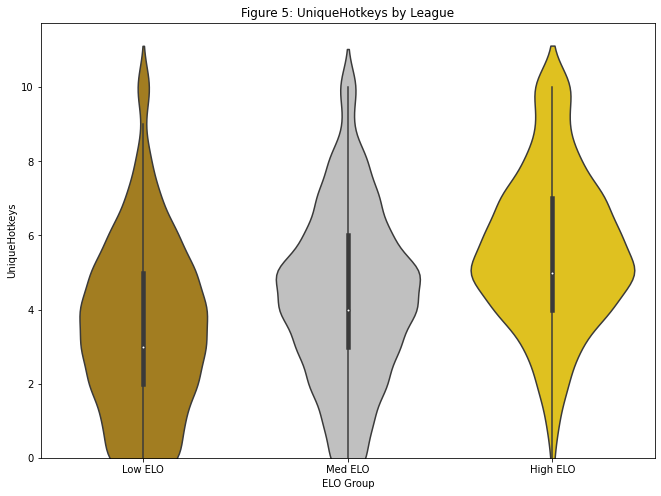

In [15]:
plot("UniqueHotkeys",5)

C:\Users\Triplea657\anaconda3\envs\MSCS335\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Triplea657\anaconda3\envs\MSCS335\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


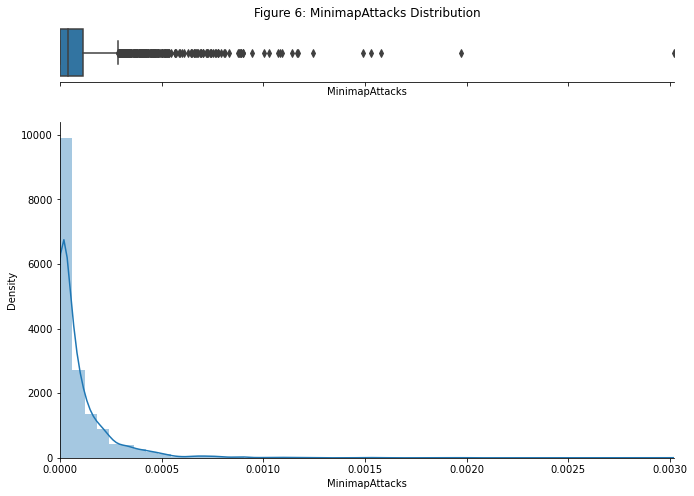

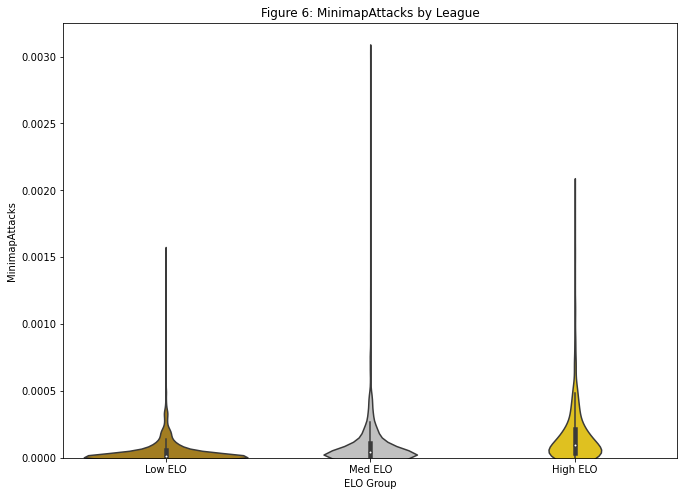

In [16]:
plot("MinimapAttacks",6)

C:\Users\Triplea657\anaconda3\envs\MSCS335\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Triplea657\anaconda3\envs\MSCS335\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


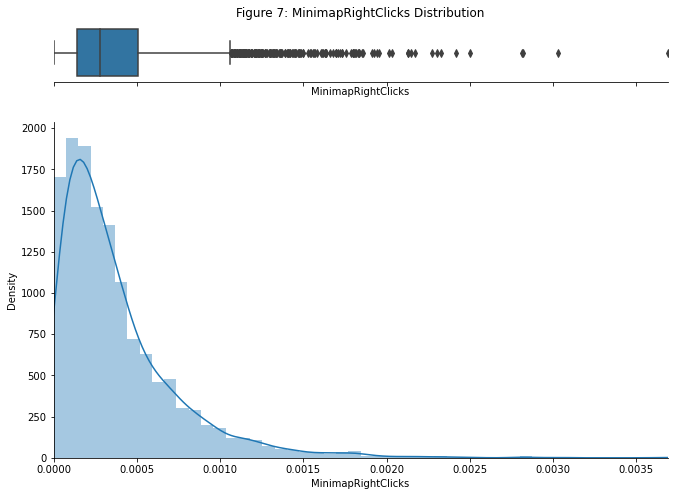

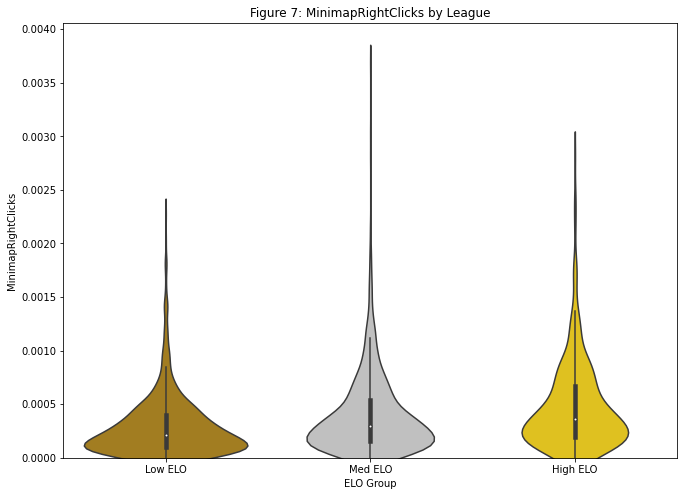

In [17]:
plot("MinimapRightClicks",7)

C:\Users\Triplea657\anaconda3\envs\MSCS335\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Triplea657\anaconda3\envs\MSCS335\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


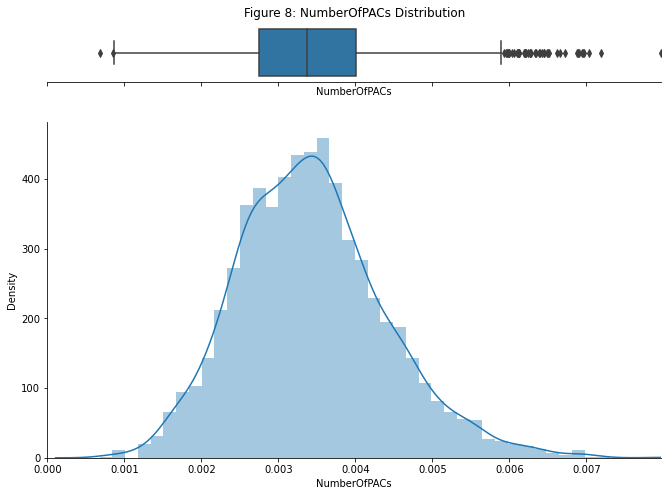

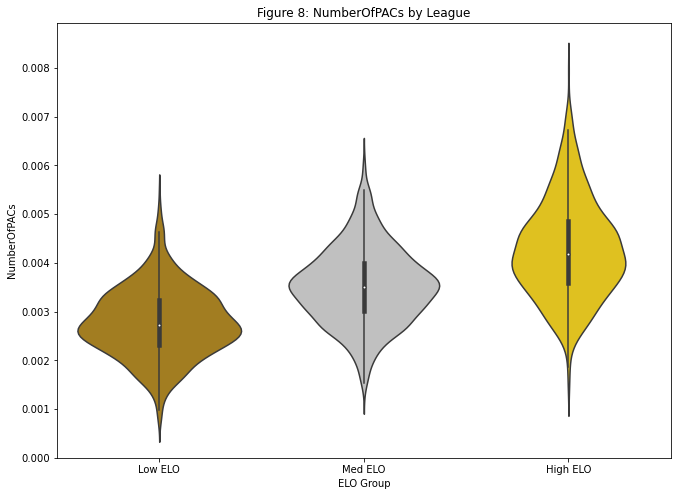

In [18]:
plot("NumberOfPACs",8)

C:\Users\Triplea657\anaconda3\envs\MSCS335\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Triplea657\anaconda3\envs\MSCS335\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


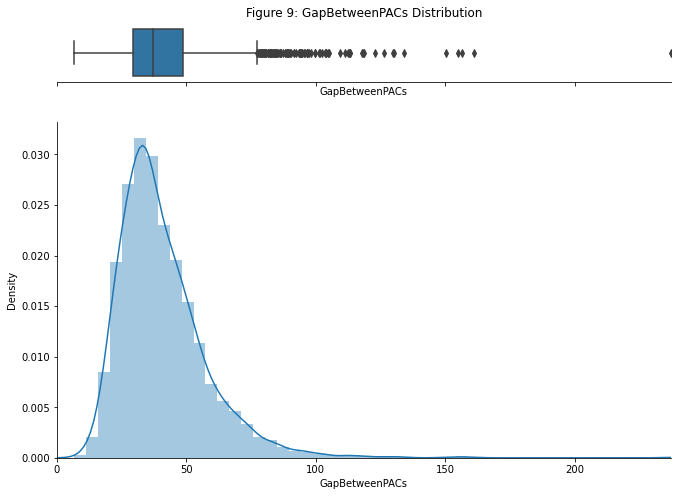

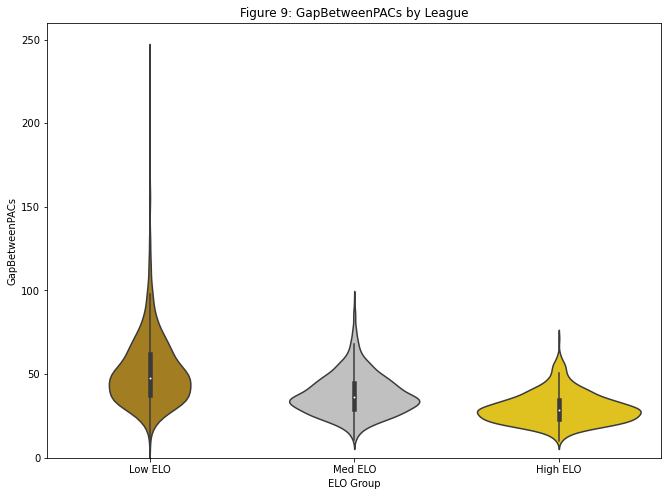

In [19]:
plot("GapBetweenPACs",9)

C:\Users\Triplea657\anaconda3\envs\MSCS335\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Triplea657\anaconda3\envs\MSCS335\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


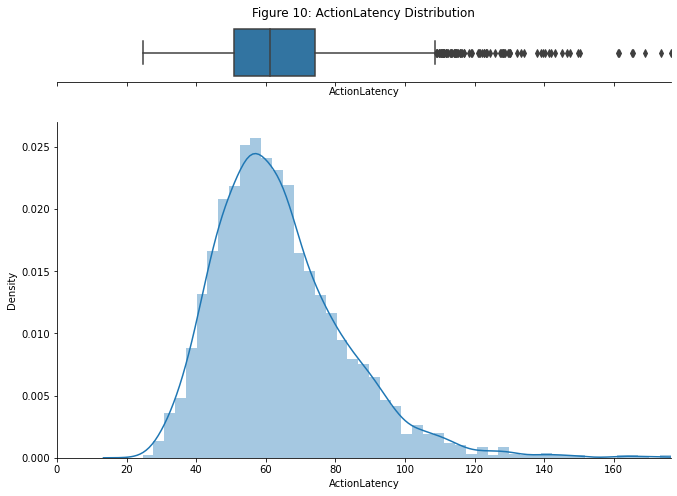

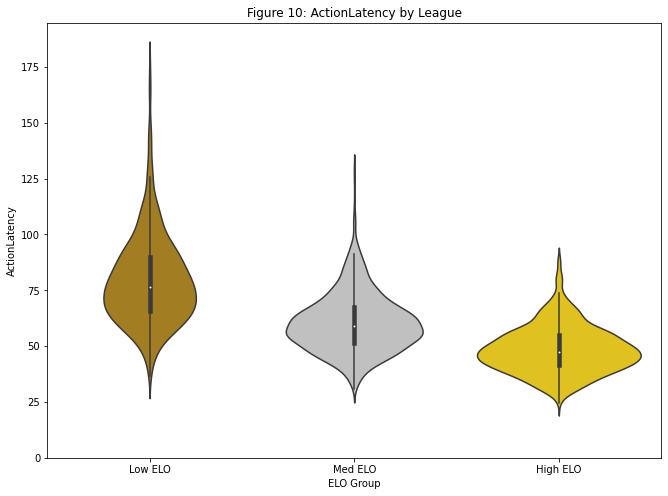

In [20]:
plot("ActionLatency",10)

C:\Users\Triplea657\anaconda3\envs\MSCS335\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Triplea657\anaconda3\envs\MSCS335\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


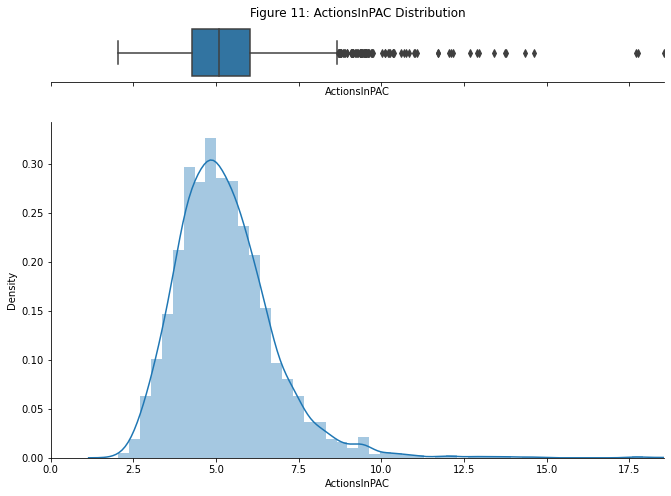

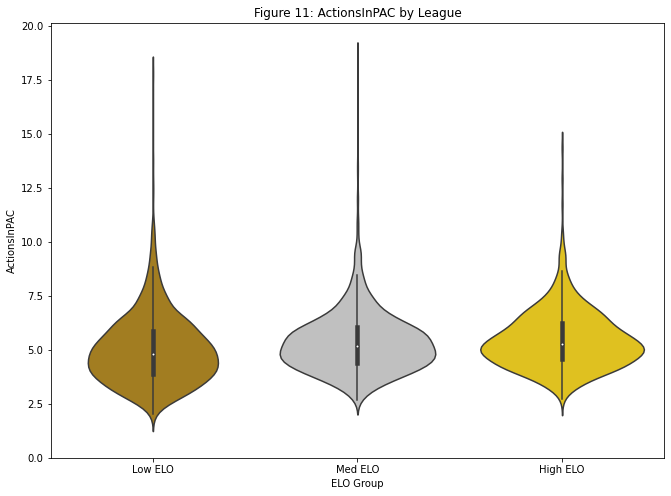

In [21]:
plot("ActionsInPAC",11)

C:\Users\Triplea657\anaconda3\envs\MSCS335\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Triplea657\anaconda3\envs\MSCS335\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


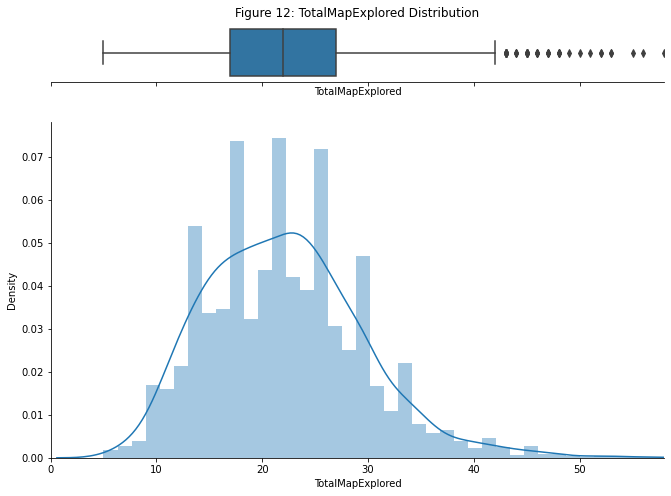

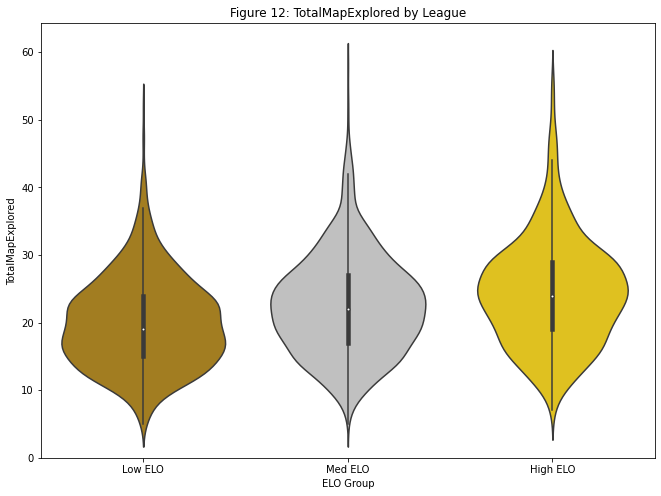

In [22]:
plot("TotalMapExplored",12)

C:\Users\Triplea657\anaconda3\envs\MSCS335\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Triplea657\anaconda3\envs\MSCS335\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


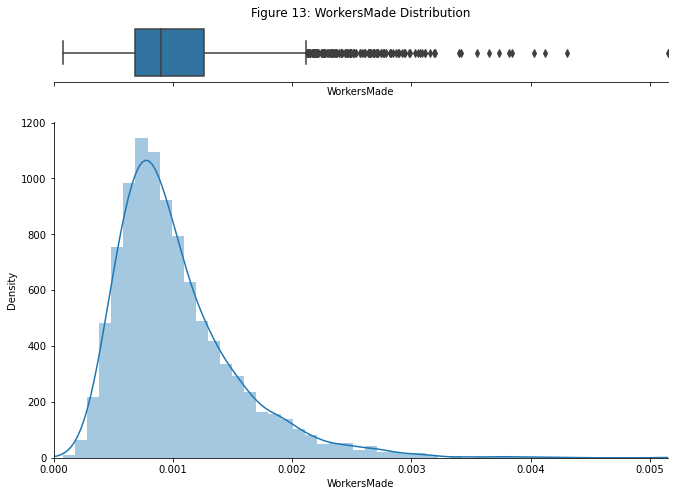

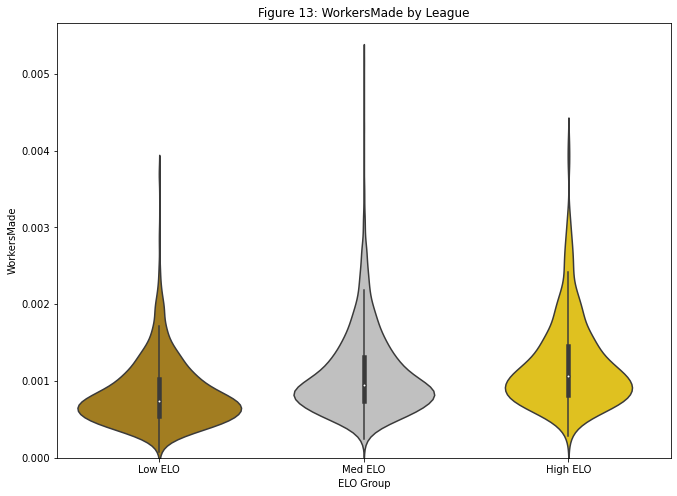

In [23]:
plot("WorkersMade",13)

C:\Users\Triplea657\anaconda3\envs\MSCS335\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Triplea657\anaconda3\envs\MSCS335\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


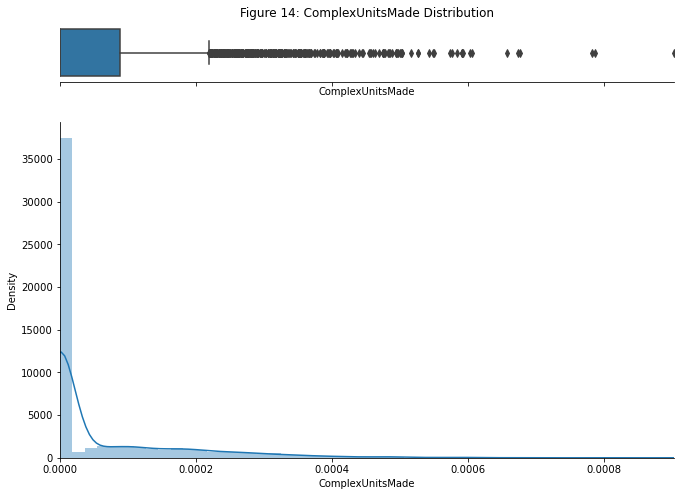

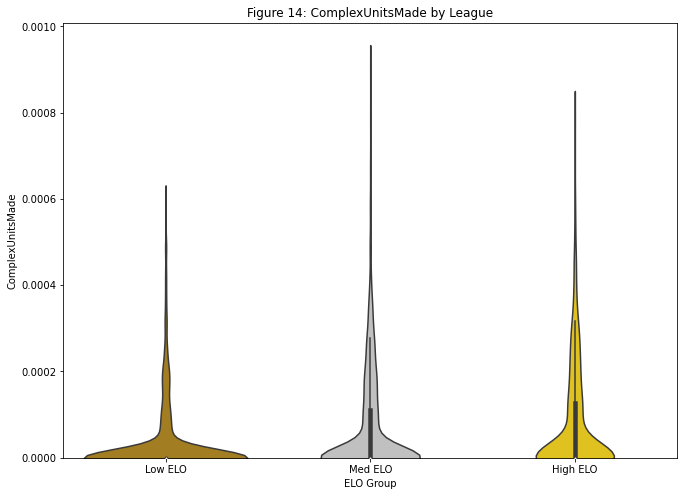

In [24]:
plot("ComplexUnitsMade",14)

C:\Users\Triplea657\anaconda3\envs\MSCS335\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Triplea657\anaconda3\envs\MSCS335\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


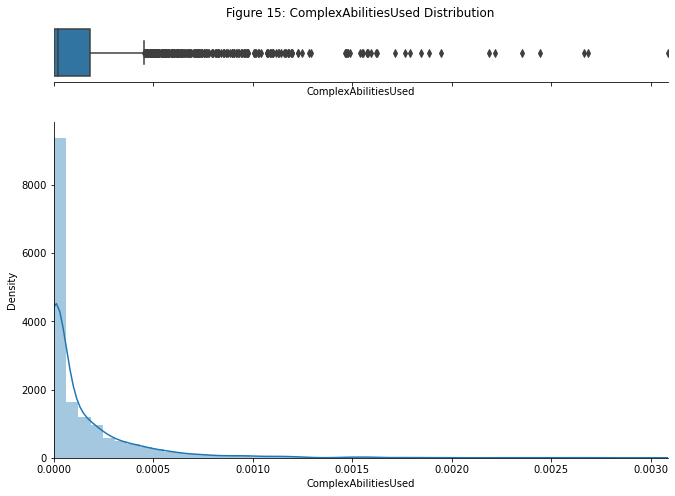

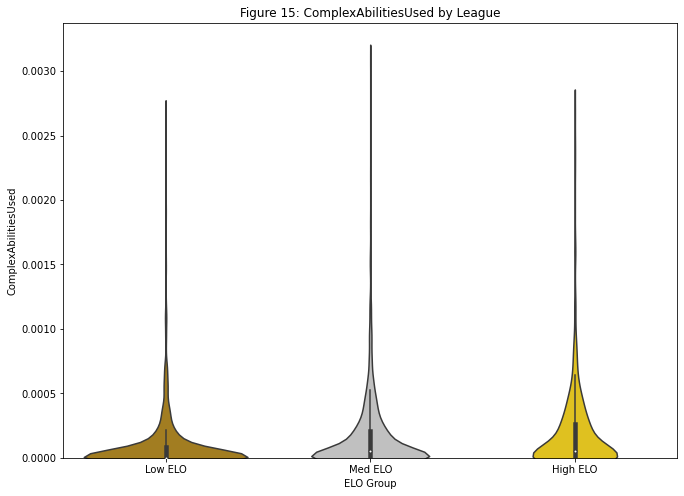

In [25]:
plot("ComplexAbilitiesUsed",15)